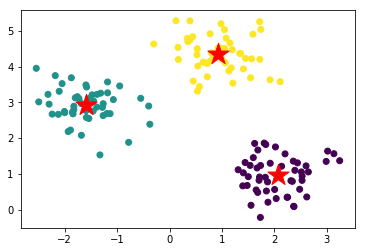

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs

X, Y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  shuffle=True,
                  random_state=0)

X = pd.DataFrame(X, columns=['x', 'y'])
x = X['x']
y = X['y']


class Kmeans(object):
    """Kmeans类"""

    def __init__(self, k):
        """
        init方法:
        k: 簇的数量, 即样本类别数
        class_of_points: 每个样本点所对应类别的矩阵
        center_of_class: 每个类的簇中心组成的矩阵
        """
        self.k = k
        self.class_of_points = None
        self.centers_of_class = None

    @classmethod
    def distance(cls, data, centers_of_class):
        '''计算数据的所有样本点与簇中心的距离,返回距离矩阵'''
    #     data: 150x2, centers_of_class: 3x2
        dist = np.zeros((data.shape[0], centers_of_class.shape[0]))
        for i in range(len(data)):
            for j in range(len(centers_of_class)):
                # 计算欧氏距离
                dist[i, j] = np.sqrt(
                    np.sum((data.iloc[i, :] - centers_of_class[j])**2))
        return dist

    @classmethod
    def point_in_cluster(self, data, centers_of_class):
        """将数据划分入对应的簇"""
        dist = Kmeans.distance(data, centers_of_class)
        # 求每一行的最小值所对应的列数(也就是簇数)所对应的矩阵
        class_of_points = np.argmin(dist, 1)
        return class_of_points

    def fit(self, data, max_iter=100):
        # 随机数初始化簇中心矩阵
        self.centers_of_class = np.random.choice(
            np.arange(-5, 5, 0.1), (self.k, 2))

        for _ in range(max_iter):
            # 点归属
            self.class_of_points = Kmeans.point_in_cluster(
                data, self.centers_of_class)
            # 簇中心更新
            for ci in range(self.k):
                # 对划分的簇求均值, 得到新的簇中心
                if(len(data[self.class_of_points == ci])!=0):
                    self.centers_of_class[ci] = data[self.class_of_points == ci].mean(
                )


km = Kmeans(3)
km.fit(X, 100)
plt.scatter(x, y, c=km.class_of_points)
plt.scatter(km.centers_of_class[:, 0],
            km.centers_of_class[:, 1], marker='*', s=500, c='r')
plt.show()


In [40]:
#计算均方误差, 通过手肘法, 测试K的最佳取值
def dis(x,y):
    return np.sqrt(sum(np.power(x - y, 2)))
# def sse(data,center):
#     return sum(dis(x,center) for x in data if )

def all_sse(data,centers,points):
    length = []
#     return sum(sse(data,center) for center in centers)
    for i in range(len(data)):
        for j in range(len(centers)):
            if points[i] == j:
                length.append(dis(data[i],centers[j]))
    return sum(length)

In [41]:
all_sse(np.array(X),km.centers_of_class,km.class_of_points)

92.50346209391444

In [42]:
sse_list = []
for k in range(1,6):
    km = Kmeans(k)
    km.fit(X)
    sse_list.append(all_sse(np.array(X),km.centers_of_class,km.class_of_points))

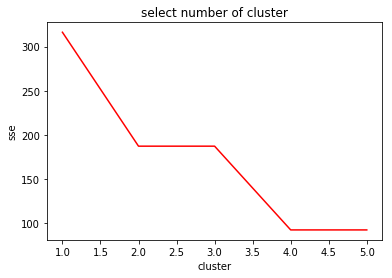

In [43]:
plt.title('select number of cluster')
plt.xlabel('cluster')
plt.ylabel('sse')
plt.plot(range(1,6),sse_list,color = 'r')

由斜率绝对值最大,取肘部为3